### <strong><font color=cornflowerblue>第六次作品：元件間連接方式的可靠度分析與模擬 </font></strong>
學號：411078064

姓名：謝意盛
<hr>

### <strong><font color=lightseagreen>作品目標</font></strong>：
本實驗探討元件間連接方式的可靠度分析，分別模擬元件串聯與並聯的情況，並通過三種估計方式來估計串聯與並聯後的元件分佈參數，分別是 "最小平方法 LSM"、"最大概似估計 MLE"、以及 "動差估計 MME"。接著，設計一套同時包含串聯與並聯的系統去進行模擬，一樣通過三種估計方式來估計結合後的系統的元件分佈參數，以判斷其可靠度。

<hr>

#### <strong><font color=indianred>載入套件</font></strong>：

In [8]:
from platform import python_version
import os, time, socket, warnings
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
from scipy.optimize import minimize
import concurrent.futures

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))

【日期時間】2024/12/20 18:00:02
【工作目錄】c:\Users\Sheng\Desktop\StatComp\hw6
【主機名稱】LAPTOP-VLOELI2C (10.201.11.233)
【Python】3.11.3


1. let 2 beta distribution,
2. 找理論上這兩個分佈的結合，
3. 通過該分佈近似出新的 beta distribution
4. 可再設多幾個原件，同樣按照上面的步驟去估計出新的 beta distribution

<hr>

### <strong><font color=cornflowerblue>目標一</font></strong>：
本目標想要估計出<font color=indianred>串聯元件</font>的 Beta 分佈參數，以下為實驗步驟：

假設兩獨立變數：$X \sim \beta(a_1, b_1)$，$Y \sim \beta(a_2, b_2)$，結合形成一新變數 $Z = XY$，推導後可得其機率密度函數為
$$f_{Z}(z) = \int_z^1 f_Y(y)f_X\left(\frac{z}{y}\right) \frac{1}{y} \;dy$$

首先，本實驗想從理論上獲得由上述 $Z$ 的 PDF 近似出的另一個 Beta 分配 $\beta(a, b)$，並估計出其參數， 方法為下述的 "最小平方法 LSM"
$$ \min_{\substack{a, b > 0}} \int_{0}^{1} (f_{Z}(z) - \beta(z|a,b))^2 \; dz $$

令 $X$, $Y$ 的 Beta 機率密度函數的參數分別為 $(a_1, b_1)=(6, 3), (a_2, b_2)=(9, 5)$，利用上述方法估計出參數 $a, b$。

$\quad$

此外，本實驗在假設無法通過數學推導來獲得 $Z$ 的真實 PDF 的情況下，通過分別生成 X 與 Y 的隨機樣本，直接利用 $Z = XY$ 的關係去進行計算，獲得 $Z$ 的樣本。接著，分別使用 "最大概似估計 MLE" 與 "動差估計 MME" 來估計出此樣本的 Beta 分佈參數值，並與從理論上估計出的參數值進行比較，觀察其差異以及是否接近參數理論值，以選擇出最適合的參數估計方法。

- MLE 在 Python 裡可使用的計算方式：
    - 使用 `scipy.optimize.minimize`；

    - 使用 `scipy.optimize.fmin`；

    - 使用 `scipy.stats.beta.fit`，其中 method = 'MLE'。

- MME 在 Python 裡可使用的計算方式：
    - 利用公式直接進行計算：
    $$ a = \bar{x}\left(\frac{\bar{x}(1 - \bar{x})}{s^2} - 1\right) $$
    $$ b = (1 - \bar{x})\left(\frac{\bar{x}(1 - \bar{x})}{s^2} - 1\right) $$

    - 使用 `scipy.stats.beta.fit`，其中 method = 'MM'。

$\quad$

串聯示意圖：
<!-- ![GitHub Logo](https://raw.githubusercontent.com/shengsia02/StatComp/refs/heads/main/hw6/series_conn.png?token=GHSAT0AAAAAAC2ML3L5FKYG4FKHP73A4WQYZ3FN3DA) -->

<p align="center">
  <img src="https://raw.githubusercontent.com/shengsia02/StatComp/refs/heads/main/hw6/series_conn.png?token=GHSAT0AAAAAAC2ML3L5FKYG4FKHP73A4WQYZ3FN3DA" alt="Example Image" width="500"/>
</p>

**<font color=indianred>Step 1</font>**：由於在計算 LSM 時會使用 `scipy.optimize.minimize` 指令，其中 `method` 裡有許多不同的演算法可供選擇，每種方法的使用條件均不相同，故本實驗嘗試使用所有可用的演算法來進行 LSM 計算，並選出最合適、最快速的演算法來進行後續的實驗。

`scipy.optimize.minimize` 裡的 15 種演算法：

<!-- 1. Unconstrained Minimization of Multivariate Scalar Functions -->

- L-BFGS-B Algorithm (`method = 'L-BFGS-B'`)，預設的 method

- Nelder-Mead Simplex Algorithm (`method = 'Nelder-Mead'`)

- Powell Algorithm (`method = 'Powell'`)

- Broyden-Fletcher-Goldfarb-Shanno Algorithm (`method = 'BFGS'`)

- Newton-Conjugate-Gradient Algorithm (`method = 'Newton-CG'`)

- Trust-Region Newton-Conjugate-Gradient Algorithm (`method = 'trust-ncg'`)

- Trust-Region Truncated Generalized Lanczos / Conjugate Gradient Algorithm (`method = 'trust-krylov'`)

- Trust-Region Nearly Exact Algorithm (`method = 'trust-exact'`)

<!-- 2. Constrained minimization of multivariate scalar functions -->

- Trust-Region Constrained Algorithm (`method = 'trust-constr'`)

- Sequential Least SQuares Programming (SLSQP) Algorithm (`method = 'SLSQP'`)

- Constrained Optimization BY Linear Approximation (COBYLA) Algorithm (`method = 'COBYLA'`)

- Constrained Optimization BY Quadratic Approximations (COBYQA) Algorithm (`method = 'COBYQA'`)

<!-- 3. Other -->

- Conjugate Gradient Algorithm (`method = 'CG'`)；

- Dog-Leg Trust-Region Algorithm (`method = 'dogleg'`)；

- Truncated Newton (TNC) Algorithm (`method = 'TNC'`)

In [ ]:
## 初始設定
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5
# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)
fy = lambda y: beta.pdf(y, a2, b2)
# 計算理論 Z 的 PDF
z = np.linspace(0, 1, 100)
def f(z):
    fxy = lambda y : fy(y) * fx(z / y) / y  # define the integrand: inline
    tmp = integrate.quad(fxy, z, 1)
    return tmp[0]
fz = np.vectorize(f)(z)  # z 如果是 array，就會自動對每個元素呼叫 f，並且返回一個 array


## 用另一個 Beta 分配 \beta(a,b) 來近似 Z 的分配
# 定義 LSM 函數
def est_beta_param(params):
    a, b = params
    beta_pdf = lambda z: beta.pdf(z, a, b)
    integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
    integral = integrate.quad(integrand, 0, 1)
    return integral[0]
# 初始值
initial = [6, 8]
# 設定邊界
bounds = [(0, np.inf), (0, np.inf)]


## 使用所有演算法來估計參數
# method = 'CG', 'BFGS', 'Newton-CG', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov' 需要 Jacobian
methods = ['Nelder-Mead', 'Powell', 'L-BFGS-B', 'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr']
a_hat = np.zeros(len(methods))
b_hat = np.zeros(len(methods))
times = np.zeros(len(methods))

for i, method in enumerate(methods):
    # 開始時間
    start_time = time.time()
    # 使用 minimize 來最小化目標函數
    result = minimize(est_beta_param, initial, bounds = bounds, method = method)
    # 結束時間
    end_time = time.time()

    # 獲取估計的參數
    a_hat[i], b_hat[i] = result.x
    times[i] = end_time - start_time

# 整理成表格呈現
algo_method = pd.DataFrame({
    'Method': methods,
    'a_hat': a_hat,
    'b_hat': b_hat,
    'times': times
})
algo_method.sort_values(by = 'times').reset_index(drop = True)

,Method,a_hat,b_hat,times
0,trust-constr,6.000002,8.000003,15.773303
1,SLSQP,5.999804,8.000263,16.616672
2,L-BFGS-B,6.000104,8.000133,18.355883
3,COBYQA,5.999999,7.999998,18.722566
4,Nelder-Mead,5.999979,7.999994,40.920044
5,TNC,5.998797,7.998314,44.829997
6,Powell,5.999962,7.999950,67.985422
7,COBYLA,5.999564,7.999255,114.140050


In [5]:
## 初始設定
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5
# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)
fy = lambda y: beta.pdf(y, a2, b2)
# 計算理論 Z 的 PDF
# z = np.linspace(0, 1, 100)
def f(z):
    fxy = lambda y : fy(y) * fx(z / y) / y  # define the integrand: inline
    tmp = integrate.quad(fxy, z, 1)
    return tmp[0]
# fz = np.vectorize(f)(z)  # z 如果是 array，就會自動對每個元素呼叫 f，並且返回一個 array


## 用另一個 Beta 分配 \beta(a,b) 來近似 Z 的分配
# 定義 LSM 函數
def est_beta_param(params):
    a, b = params
    beta_pdf = lambda z: beta.pdf(z, a, b)
    integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
    integral = integrate.quad(integrand, 0, 1)
    return integral[0]
# 初始值
initial = [6, 8]
# 設定邊界
bounds = [(0, np.inf), (0, np.inf)]


## 使用所有演算法來估計參數
# method = 'CG', 'BFGS', 'Newton-CG', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov' 需要 Jacobian
methods = ['Nelder-Mead', 'Powell', 'L-BFGS-B', 'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr']
a_hat_avg = np.zeros(len(methods))
b_hat_avg = np.zeros(len(methods))
times_avg = np.zeros(len(methods))
# 重複計算 r 次
r = 10

# for i, method in enumerate(methods):
#     a_hat = np.zeros(r)
#     b_hat = np.zeros(r)
#     times = np.zeros(r)

#     for j in range(r):
#         # 開始時間
#         start_time = time.time()
#         # 使用 minimize 來最小化目標函數
#         result = minimize(est_beta_param, initial, bounds = bounds, method = method)
#         # 結束時間
#         end_time = time.time()
#         # 獲取估計的參數
#         a_hat[j], b_hat[j] = result.x
#         times[j] = end_time - start_time

#     # 取平均
#     a_hat_avg[i] = np.mean(a_hat)
#     b_hat_avg[i] = np.mean(b_hat)
#     times_avg[i] = np.mean(times)

# # 整理成表格呈現
# algo_method = pd.DataFrame({
#     'Method': methods,
#     'a_hat_avg': a_hat,
#     'b_hat_avg': b_hat,
#     'times_avg': times
# })
# algo_method.sort_values(by = 'times_avg').reset_index(drop = True)

# 使用多執行緒來加速計算
def run_method(method):
    a_hat = np.zeros(r)
    b_hat = np.zeros(r)
    times = np.zeros(r)

    for j in range(r):
        # 開始時間
        start_time = time.time()
        # 使用 minimize 來最小化目標函數
        result = minimize(est_beta_param, initial, bounds = bounds, method = method)
        # 結束時間
        end_time = time.time()
        # 獲取估計的參數
        a_hat[j], b_hat[j] = result.x
        times[j] = end_time - start_time

    # 取平均
    return np.mean(a_hat), np.mean(b_hat), np.mean(times)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(run_method, methods))

for i, (a_avg, b_avg, t_avg) in enumerate(results):
    a_hat_avg[i] = a_avg
    b_hat_avg[i] = b_avg
    times_avg[i] = t_avg


## 整理成表格呈現
algo_method = pd.DataFrame({
    'Method': methods,
    'a_hat_Avg': a_hat_avg,
    'b_hat_Avg': b_hat_avg,
    'Times_Avg': times_avg
})
algo_method.sort_values(by = 'Times_Avg').reset_index(drop = True)

,Method,a_hat_avg,b_hat_avg,times_avg
0,SLSQP,6.000000,8.000000,1.713252
1,TNC,6.000000,8.000000,2.019271
2,L-BFGS-B,6.000000,8.000000,2.198994
3,Powell,5.999997,8.000001,10.153173
4,COBYLA,5.999922,8.000063,16.011620
5,COBYQA,6.000000,8.000000,18.104385
6,trust-constr,6.000015,8.000021,21.598904
7,Nelder-Mead,6.000000,8.000000,23.323695


#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

**<font color=lightseagreen>結論</font>**：

<hr>

**<font color=indianred>Step 2</font>**：根據上述的參數設定，分別畫出 $X$ 與 $Y$ 的分佈曲線，並利用推導出的 $Z$ 理論分佈，使用 LSM 來近似出 Beta 分佈，並畫出理論分佈曲線與 Beta 分佈曲線，觀察近似出的分佈表現與趨勢，並與理論分佈進行比較。

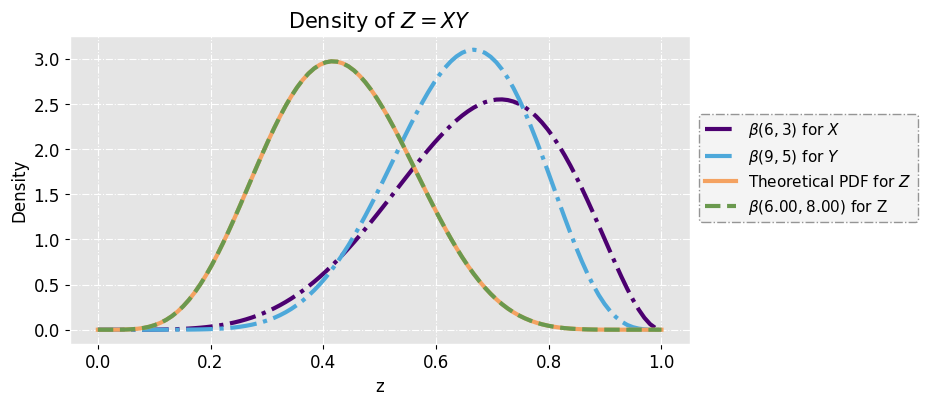

In [29]:
## 初始設定
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5
# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)
fy = lambda y: beta.pdf(y, a2, b2)
# 計算理論 Z 的 PDF
z = np.linspace(0, 1, 100)
def f(z):
    fxy = lambda y : fy(y) * fx(z / y) / y  # define the integrand: inline
    tmp = integrate.quad(fxy, z, 1)
    return tmp[0]
fz = np.vectorize(f)(z)  # z 如果是 array，就會自動對每個元素呼叫 f，並且返回一個 array


## 用另一個 Beta 分配 \beta(a,b) 來近似 Z 的分配
# 定義 LSM 函數
def est_beta_param(params):
    a, b = params
    beta_pdf = lambda z: beta.pdf(z, a, b)
    integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
    integral = integrate.quad(integrand, 0, 1)
    return integral[0]
# 初始值
initial = [6, 8]
# 設定邊界
bounds = [(0, np.inf), (0, np.inf)]
# 使用 minimize 來估計出參數
result = minimize(est_beta_param, initial, bounds = bounds , method = 'SLSQP')
# 獲取估計的參數
a_hat, b_hat = result.x


## 畫圖
plt.style.use('ggplot')
fig = plt.figure(figsize=(8, 4))
plt.plot(z, fx(z), label = f'$\\beta({a1}, {b1})$ for $X$', linestyle = '-.', linewidth = 3
         , color = '#4c0070')
plt.plot(z, fy(z), label = f'$\\beta({a2}, {b2})$ for $Y$', linestyle = '-.', linewidth = 3
         , color = '#4da8da')
plt.plot(z, fz, label = f'Theoretical PDF for $Z$' , linewidth = 3, linestyle = '-'
         , color = '#f4a261')
plt.plot(z, beta.pdf(z, a_hat, b_hat), label = f'$\\beta({a_hat:.2f}, {b_hat:.2f})$ for Z'
         , linewidth = 3, linestyle = '--', color = '#6a994e')
plt.xlabel('z', fontsize = 12, color = 'black')
plt.ylabel('Density', fontsize = 12, color = 'black')
plt.title('Density of $Z = XY$', fontsize = 15, color = 'black')
plt.tick_params(axis = 'both', labelsize = 12, colors = 'black')
lgd = plt.legend(edgecolor = '#666666', prop = {'size': 11}, frameon = True \
                 , bbox_to_anchor = (1.38, 0.77))
lgd.get_frame().set_linestyle('-.')
lgd.get_frame().set_alpha(0.4)
lgd.get_frame().set_linewidth(1)
lgd.get_frame().set_edgecolor('black')
plt.grid(True, linestyle = '-.', color = 'white')
plt.show()

**<font color=indianred>Step 3</font>**：分別生成 $X$ 與 $Y$ 的隨機樣本，直接利用 $Z = XY$ 的關係去進行計算，獲得 $Z$ 的樣本。接著，分別使用 "最大概似估計 MLE" 與 "動差估計 MME" 來估計出此樣本的 Beta 分佈參數值，並與 LSM 估計出的理論參數值進行比較，觀察其差異以及是否接近理論參數值，以選擇出最適合的參數估計方法。

In [30]:
## 定義 LSM
def LSM(a1, b1, a2, b2):
    # 設定 X, Y 的分配
    fx = lambda x: beta.pdf(x, a1, b1)
    fy = lambda y: beta.pdf(y, a2, b2)

    def f(z):
        fxy = lambda y : fy(y) * fx(z / y) / y  # define the integrand: inline
        tmp = integrate.quad(fxy, z, 1)
        return tmp[0]

    # 用另一個貝他分配 \beta(a,b) 來近似 Z 的分配
    # 定義最小值函數
    def est_beta_param(params):
        a, b = params
        beta_pdf = lambda z: beta.pdf(z, a, b)
        integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
        integral = integrate.quad(integrand, 0, 1)
        return integral[0]

    # 初始值
    initial = [6, 8]
    # 設定邊界
    bounds = [(0, np.inf), (0, np.inf)]

    # 使用 minimize 來最小化目標函數
    result = minimize(est_beta_param, initial, bounds = bounds , method = 'SLSQP')

    # 獲取估計的參數
    a_hat, b_hat = result.x
    return a_hat, b_hat

## 定義 MLE
# def MLE(Z):
#     # 定義負對數似然函數
#     def neg_log_likelihood(params):
#         a, b = params
#         return -np.sum(np.log(beta.pdf(Z, a, b)))

#     # 初始值
#     initial = [2, 2]

#     # 設定邊界
#     bnds = [(0, np.inf), (0, np.inf)]

#     # 使用 minimize 來最小化負對數似然函數
#     result = minimize(neg_log_likelihood, initial, bounds = bnds, method = 'L-BFGS-B')

#     # 獲取估計的參數
#     a_hat, b_hat = result.x
#     return a_hat, b_hat

def MLE(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MLE')
    return a_hat, b_hat

## 定義 MME
def MME(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MM')
    return a_hat, b_hat

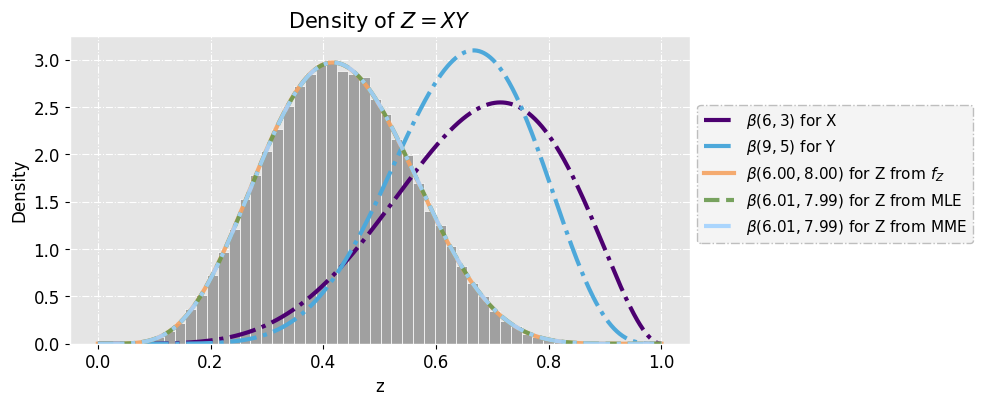

In [34]:
# 設定參數
a1, b1, a2, b2 = 6, 3, 9, 5

# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)
fy = lambda y: beta.pdf(y, a2, b2)

## 設定樣本
# 樣本數
n = 100000
# 生成來自 beta 分佈的樣本
x = beta.rvs(a1, b1, size = n)
y = beta.rvs(a2, b2, size = n)
Z = x * y

a_hat_lsm, b_hat_lsm = LSM(a1, b1, a2, b2)
a_hat_mle, b_hat_mle = MLE(Z)
a_hat_mme, b_hat_mme = MME(Z)


# 繪圖
z = np.linspace(0, 1, 1000)
fz_lsm = beta.pdf(z, a_hat_lsm, b_hat_lsm)
fz_mle = beta.pdf(z, a_hat_mle, b_hat_mle)
fz_mme = beta.pdf(z, a_hat_mme, b_hat_mme)

plt.style.use('ggplot')
fig = plt.figure(figsize = (8, 4))
plt.plot(z, fx(z), label = f'$\\beta({a1}, {b1})$ for X', linestyle = '-.', linewidth = 3
         , color = '#4c0070')
plt.plot(z, fy(z), label = f'$\\beta({a2}, {b2})$ for Y', linestyle = '-.', linewidth = 3
         , color = '#4da8da')
plt.plot(z, fz_lsm, label = f'$\\beta({a_hat_lsm:.2f}, {b_hat_lsm:.2f})$ for Z from $f_Z$' \
         , linewidth = 3, linestyle = '-', alpha = 0.9, color = '#f4a261')
plt.plot(z, fz_mle, label = f'$\\beta({a_hat_mle:.2f}, {b_hat_mle:.2f})$ for Z from MLE' \
         , linewidth = 3, linestyle = '--', alpha = 0.9, color = '#6a994e')
plt.plot(z, fz_mme, label = f'$\\beta({a_hat_mme:.2f}, {b_hat_mme:.2f})$ for Z from MME' \
         , linewidth = 3, linestyle = '-.', alpha = 0.9, color = '#a2d2ff')
plt.hist(Z, bins = 45, density = True, color = '#A0A0A0' \
         , edgecolor = 'white')
plt.xlabel('z', fontsize = 12, color = 'black')
plt.ylabel('Density', fontsize = 12, color = 'black')
plt.title('Density of $Z = XY$', fontsize = 15, color = 'black')
plt.tick_params(axis = 'both', labelsize = 12, colors = 'black')
lgd = plt.legend(edgecolor = '#666666', prop = {'size': 11}, frameon = True \
                 , bbox_to_anchor = (1.47, 0.8))
lgd.get_frame().set_linestyle('-.')
lgd.get_frame().set_alpha(0.4)
lgd.get_frame().set_linewidth(1)
plt.grid(True, linestyle = '-.', color = 'white')
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

**<font color=lightseagreen>結論</font>**：

<hr>

### <strong><font color=cornflowerblue>目標二</font></strong>：
本目標想要估計出<font color=indianred>並聯元件</font>的 Beta 分佈參數，以下為實驗步驟：

假設一獨立變數：$X \sim \beta(a_1, b_1)$，若視 $Z$ 為兩個相同元件並聯後的可靠度，結合形成一新變數 $Z = 1 - (1 - X)^2$，推導後可得其機率密度函數為
$$f_{Z}(z) = \frac{f_{X}(1 - \sqrt{1 - z})}{2\sqrt{1 - z}}$$

首先，本實驗想從理論上獲得由上述 $Z$ 的 PDF 近似出的另一個 Beta 分配 $\beta(a, b)$，並估計出其參數， 方法為下述的 "最小平方法 LSM"
$$ \min_{\substack{a, b > 0}} \int_{0}^{1} (f_{Z}(z) - \beta(z|a,b))^2 \; dz $$

令 $X$ 的 Beta 機率密度函數的參數為 $(a_1, b_1)=(6, 3)$，利用上述方法估計出參數 $a, b$。

$\quad$

此外，本實驗在假設無法通過數學推導來獲得 $Z$ 的真實 PDF 的情況下，通過生成 $X$ 的隨機樣本，直接利用 $Z = 1 - (1 - X)^2$ 的關係去進行計算，獲得 $Z$ 的樣本。接著，分別使用 "最大概似估計 MLE" 與 "動差估計 MME" 來估計出此樣本的 Beta 分佈參數值，並與從理論上估計出的參數值進行比較，觀察其差異以及是否接近參數理論值，以選擇出最適合的參數估計方法。

- MLE 在 Python 裡可使用的計算方式：
    - 使用 `scipy.optimize.minimize`；

    - 使用 `scipy.optimize.fmin`；

    - 使用 `scipy.stats.beta.fit`，其中 method = 'MLE'。

- MME 在 Python 裡可使用的計算方式：
    - 利用公式直接進行計算：
    $$ a = \bar{x}\left(\frac{\bar{x}(1 - \bar{x})}{s^2} - 1\right) $$
    $$ b = (1 - \bar{x})\left(\frac{\bar{x}(1 - \bar{x})}{s^2} - 1\right) $$

    - 使用 `scipy.stats.beta.fit`，其中 method = 'MM'。

$\quad$

並聯示意圖：

<p align="center">
  <img src="https://raw.githubusercontent.com/shengsia02/StatComp/refs/heads/main/hw6/series_conn.png?token=GHSAT0AAAAAAC2ML3L5FKYG4FKHP73A4WQYZ3FN3DA" alt="Example Image" width="500"/>
</p>    

**<font color=indianred>Step 1</font>**：由於在計算 LSM 時會使用 `scipy.optimize.minimize` 指令，其中 `method` 裡有許多不同的演算法可供選擇，每種方法的使用條件均不相同，故本實驗嘗試使用所有可用的演算法來進行 LSM 計算，並選出最合適、最快速的演算法來進行後續的實驗。

In [43]:
## 忽略特定类型的警告
warnings.filterwarnings("ignore")


## 初始設定
# 設定參數
a1, b1 = 6, 3
# 設定 X 的分配
fx = lambda x: beta.pdf(x, a1, b1)
# 計算理論 Z 的 PDF
# z = np.linspace(0, 0.999, 100)
f = lambda z : fx(1 - np.sqrt(1 - z)) / (2 * np.sqrt(1 - z))
# fz = np.vectorize(f)(z)  # z 如果是 array，就會自動對每個元素呼叫 f，並且返回一個 array


## 用另一個 Beta 分配 \beta(a,b) 來近似 Z 的分配
# 定義 LSM 函數
def est_beta_param(params):
    a, b = params
    beta_pdf = lambda z: beta.pdf(z, a, b)
    integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
    integral = integrate.quad(integrand, 0, 1)
    return integral[0]
# 初始值
initial = [8, 1]
# 設定邊界
bounds = [(0, np.inf), (0, np.inf)]


## 使用所有演算法來估計參數
methods = ['Nelder-Mead', 'Powell', 'L-BFGS-B', 'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr']
a_hat_avg = np.zeros(len(methods))
b_hat_avg = np.zeros(len(methods))
times_avg = np.zeros(len(methods))
# 重複計算 r 次
r = 5

# 使用多執行緒來加速計算
def run_method(method):
    a_hat = np.zeros(r)
    b_hat = np.zeros(r)
    times = np.zeros(r)

    for j in range(r):
        # 開始時間
        start_time = time.time()
        # 使用 minimize 來最小化目標函數
        result = minimize(est_beta_param, initial, bounds = bounds, method = method)
        # 結束時間
        end_time = time.time()
        # 獲取估計的參數
        a_hat[j], b_hat[j] = result.x
        times[j] = end_time - start_time

    # 取平均
    return np.mean(a_hat), np.mean(b_hat), np.mean(times)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(run_method, methods))

for i, (a_avg, b_avg, t_avg) in enumerate(results):
    a_hat_avg[i] = a_avg
    b_hat_avg[i] = b_avg
    times_avg[i] = t_avg


## 整理成表格呈現
algo_method = pd.DataFrame({
    'Method': methods,
    'a_hat_Avg': a_hat_avg,
    'b_hat_Avg': b_hat_avg,
    'Times_Avg': times_avg
})
algo_method.sort_values(by = 'Times_Avg').reset_index(drop = True)

,Method,a_hat_Avg,b_hat_Avg,Times_Avg
0,SLSQP,8.317821,1.221653,13.747858
1,L-BFGS-B,8.310614,1.221092,19.496467
2,COBYQA,8.310074,1.221086,20.530334
3,Powell,8.310058,1.221093,26.983878
4,Nelder-Mead,8.310086,1.221083,29.544372
5,TNC,7.821686,1.185444,30.715180
6,trust-constr,8.310311,1.221103,76.069975
7,COBYLA,8.272594,1.218462,91.310336


#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

**<font color=lightseagreen>結論</font>**：

<hr>

**<font color=indianred>Step 2</font>**：根據上述的參數設定，畫出 $X$ 的分佈曲線，並利用推導出的 $Z$ 理論分佈，使用 LSM 來近似出 Beta 分佈，並畫出理論分佈曲線與 Beta 分佈曲線，觀察近似出的分佈表現與趨勢，並與理論分佈進行比較。

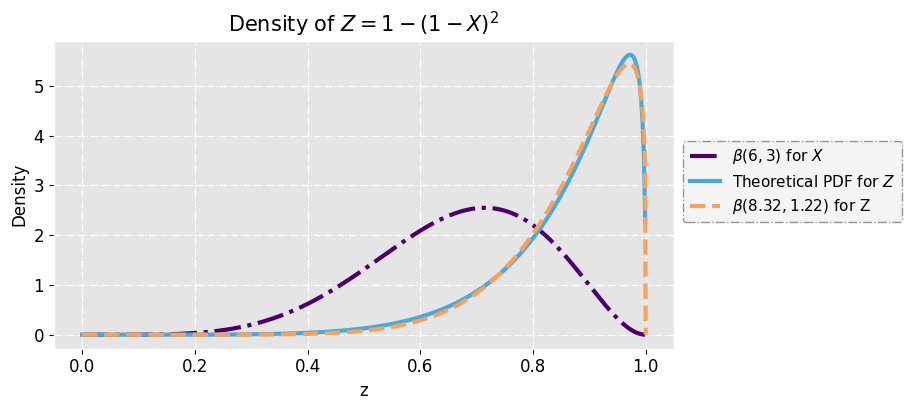

In [44]:
## 初始設定
# 設定參數
a1, b1 = 6, 3
# 設定 X 的分配
fx = lambda x: beta.pdf(x, a1, b1)
# 計算理論 Z 的 PDF
z = np.linspace(0, 1, 1000)
f = lambda z : fx(1 - np.sqrt(1 - z)) / (2 * np.sqrt(1 - z))
fz = np.vectorize(f)(z)  # z 如果是 array，就會自動對每個元素呼叫 f，並且返回一個 array


## 用另一個 Beta 分配 \beta(a,b) 來近似 Z 的分配
# 定義 LSM 函數
def est_beta_param(params):
    a, b = params
    beta_pdf = lambda z: beta.pdf(z, a, b)
    integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
    integral = integrate.quad(integrand, 0, 1)
    return integral[0]
# 初始值
initial = [8, 1]
# 設定邊界
bounds = [(0, np.inf), (0, np.inf)]
# 使用 minimize 來估計出參數
result = minimize(est_beta_param, initial, bounds = bounds , method = 'SLSQP')
# 獲取估計的參數
a_hat, b_hat = result.x


## 畫圖
plt.style.use('ggplot')
fig = plt.figure(figsize = (8, 4))
plt.plot(z, fx(z), label = f'$\\beta({a1}, {b1})$ for $X$', linestyle = '-.', linewidth = 3
         , color = '#4c0070')
plt.plot(z, fz, label = f'Theoretical PDF for $Z$' , linewidth = 3, linestyle = '-'
         , color = '#4da8da')
plt.plot(z, beta.pdf(z, a_hat, b_hat), label = f'$\\beta({a_hat:.2f}, {b_hat:.2f})$ for Z'
         , linewidth = 3, linestyle = '--', color = '#f4a261')
plt.xlabel('z', fontsize = 12, color = 'black')
plt.ylabel('Density', fontsize = 12, color = 'black')
plt.title('Density of $Z = 1 - (1 - X)^2$', fontsize = 15, color = 'black')
plt.tick_params(axis = 'both', labelsize = 12, colors = 'black')
lgd = plt.legend(edgecolor = '#666666', prop = {'size': 11}, frameon = True \
                 , bbox_to_anchor = (1.38, 0.7))
lgd.get_frame().set_linestyle('-.')
lgd.get_frame().set_alpha(0.4)
lgd.get_frame().set_linewidth(1)
lgd.get_frame().set_edgecolor('black')
plt.grid(True, linestyle = '-.', color = 'white')
plt.show()

**<font color=indianred>Step 3</font>**：生成 $X$ 的隨機樣本，直接利用 $Z = 1 - (1 - X)^2$ 的關係去進行計算，獲得 $Z$ 的樣本。接著，分別使用 "最大概似估計 MLE" 與 "動差估計 MME" 來估計出此樣本的 Beta 分佈參數值，並與 LSM 估計出的理論參數值進行比較，觀察其差異以及是否接近理論參數值，以選擇出最適合的參數估計方法。

In [45]:
## 定義 LSM
def LSM(a1, b1):
    # 設定 X, Y 的分配
    fx = lambda x: beta.pdf(x, a1, b1)
    # 計算理論 Z 的 PDF
    f = lambda z : fx(1 - np.sqrt(1 - z)) / (2 * np.sqrt(1 - z))

    # 用另一個貝他分配 \beta(a,b) 來近似 Z 的分配
    # 定義 LSM 函數
    def est_beta_param(params):
        a, b = params
        beta_pdf = lambda z: beta.pdf(z, a, b)
        integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
        integral = integrate.quad(integrand, 0, 1)
        return integral[0]
    # 初始值
    initial = [8, 1]
    # 設定邊界
    bounds = [(0, np.inf), (0, np.inf)]

    # 使用 minimize 來最小化目標函數
    result = minimize(est_beta_param, initial, bounds = bounds , method = 'SLSQP')
    # 獲取估計的參數
    a_hat, b_hat = result.x
    return a_hat, b_hat

## 定義 MLE
def MLE(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MLE')
    return a_hat, b_hat

## 定義 MME
def MME(Z):
    a_hat, b_hat, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MM')
    return a_hat, b_hat

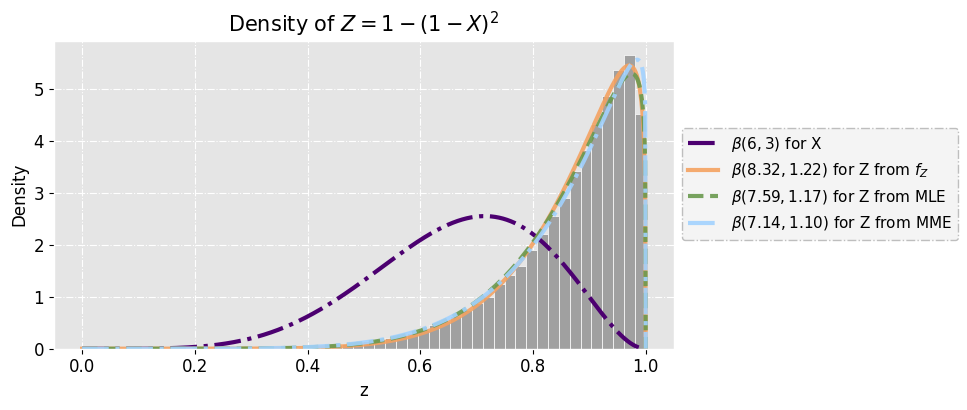

In [62]:
## 忽略特定类型的警告
warnings.filterwarnings("ignore")


# 設定參數
a1, b1 = 6, 3

# 設定 X, Y 的分配
fx = lambda x: beta.pdf(x, a1, b1)

## 設定樣本
# 樣本數
n = 100000
# 生成來自 beta 分佈的樣本
x = beta.rvs(a1, b1, size = n)
Z = 1 - (1 - x) ** 2

a_hat_lsm, b_hat_lsm = LSM(a1, b1)
a_hat_mle, b_hat_mle = MLE(Z)
a_hat_mme, b_hat_mme = MME(Z)


# 繪圖
z = np.linspace(0, 1, 1000)
fz_lsm = beta.pdf(z, a_hat_lsm, b_hat_lsm)
fz_mle = beta.pdf(z, a_hat_mle, b_hat_mle)
fz_mme = beta.pdf(z, a_hat_mme, b_hat_mme)

plt.style.use('ggplot')
fig = plt.figure(figsize = (8, 4))
plt.plot(z, fx(z), label = f'$\\beta({a1}, {b1})$ for X', linestyle = '-.', linewidth = 3
         , color = '#4c0070')
plt.plot(z, fz_lsm, label = f'$\\beta({a_hat_lsm:.2f}, {b_hat_lsm:.2f})$ for Z from $f_Z$' \
         , linewidth = 3, linestyle = '-', alpha = 0.9, color = '#f4a261')
plt.plot(z, fz_mle, label = f'$\\beta({a_hat_mle:.2f}, {b_hat_mle:.2f})$ for Z from MLE' \
         , linewidth = 3, linestyle = '--', alpha = 0.9, color = '#6a994e')
plt.plot(z, fz_mme, label = f'$\\beta({a_hat_mme:.2f}, {b_hat_mme:.2f})$ for Z from MME' \
         , linewidth = 3, linestyle = '-.', alpha = 0.9, color = '#a2d2ff')
plt.hist(Z, bins = 45, density = True, color = '#A0A0A0' \
         , edgecolor = 'white')
plt.xlabel('z', fontsize = 12, color = 'black')
plt.ylabel('Density', fontsize = 12, color = 'black')
plt.title('Density of $Z = 1 - (1 - X)^2$', fontsize = 15, color = 'black')
plt.tick_params(axis = 'both', labelsize = 12, colors = 'black')
lgd = plt.legend(edgecolor = '#666666', prop = {'size': 11}, frameon = True \
                 , bbox_to_anchor = (1.47, 0.74))
lgd.get_frame().set_linestyle('-.')
lgd.get_frame().set_alpha(0.4)
lgd.get_frame().set_linewidth(1)
plt.grid(True, linestyle = '-.', color = 'white')
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

**<font color=lightseagreen>結論</font>**：

<hr>

### <strong><font color=cornflowerblue>目標三</font></strong>：



#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

**<font color=lightseagreen>結論</font>**：

<hr>
<hr>

### <strong><font color=lightseagreen>附錄</font></strong>：

